# <u>Modèle linéaire</u>

L'objectif du code ici présent, est de vérifier si il est possible de créer un modèle linéaire et si une regression linéaire peut-être utile pour classifier les images du dataset "CIFAR-10".

Dans un premier temps, il est important de savoir que la classification d'image va dépendre des composantes principales d'une image :

- Les pixels indiqués en Rouge-Vert-Bleu
- Des composantes déterminées par réduction de dimension ou par groupement de composantes.

### Imports

Nous allons importer notre dataset directement à partir des datasets présents sur keras :

In [13]:
from tensorflow.keras.datasets import cifar10

Nous importons également notre librairie custom, que vous pouvez consulter [en cliquant ici](https://github.com/TheoHd/dl-kaggle-dataset-analysis/blob/theo/src/linear.py)

In [1]:
import src.models.processes.linear as lnr

ModuleNotFoundError: No module named 'src'

On charge les données de CIFAR-10 dans des variables d'entrainement et de validation :

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Tentative de classification d'images directement par pixels

In [16]:
x = x_train.reshape(50000,32*32*3)
y = y_train

In [17]:
colors = ['gray','rosybrown','darksalmon','bisque','tan','gold','darkkhaki','olivedrab','royalblue','plum']
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

red_index = 0
green_index = 1
blue_index = 2

### Rapport entre le <span style="color:green;">vert</span> et le <span style="color:red;">rouge</span>

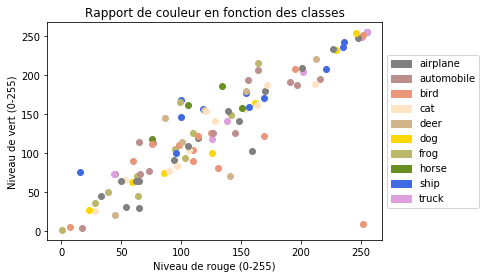

In [18]:
lnr.plot_rgb_comparison(
    x,
    y,
    red_index,
    green_index,
    colors,
    labels,
    title="Rapport de couleur en fonction des classes",
    xlabel="Niveau de rouge (0-255)",
    ylabel="Niveau de vert (0-255)"
)

### Rapport entre le <span style="color:blue;">bleu</span> et le <span style="color:red;">rouge</span>

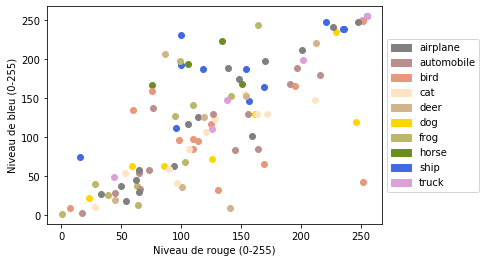

In [19]:
lnr.plot_rgb_comparison(
    x,
    y,
    red_index,
    blue_index,
    colors,
    labels,
    xlabel="Niveau de rouge (0-255)",
    ylabel="Niveau de bleu (0-255)"
)

### Rapport entre le <span style="color:blue;">bleu</span> et le <span style="color:green;">vert</span>

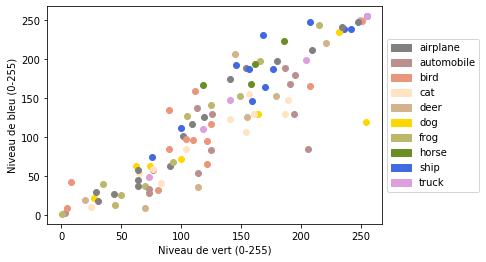

In [20]:
lnr.plot_rgb_comparison(
    x,
    y,
    green_index,
    blue_index,
    colors,
    labels,
    xlabel="Niveau de vert (0-255)",
    ylabel="Niveau de bleu (0-255)"
)

Il est difficile à partir du rapport entre les couleurs d'effectuer une séparation linéaire. Les composantes simples telles
que les couleurs peuvent fonctionner si les images se ressemblent beaucoup. Or dans notre cas nous cherchons à prédire quel est
le label de notre image sans pour autant qu'elles soient trop semblables comme dans CIFAR-10.

En essayant de distinguer des composantes plus importantes, on pourrait éventuellement effectuer une séparation linéaire des classes.

## Classification d'images par PCA

In [21]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Séparation des données

In [22]:
x_train_flat = np.array(x_train[:100]).reshape((100,32*32*3))
pca_dims = PCA()
pca_dims.fit(x_train_flat)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

pca = PCA(n_components=d)
x_reduced = pca.fit_transform(x_train_flat)
x_recovered = pca.inverse_transform(x_reduced)

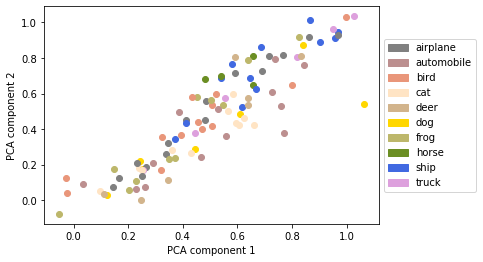

In [23]:
x_recovered_to_plot = x_recovered[:100].reshape((100, 32 * 32 * 3))
y_to_plot = y_train[:100]

lnr.plot_pca(x_recovered_to_plot, y_to_plot, colors, labels)

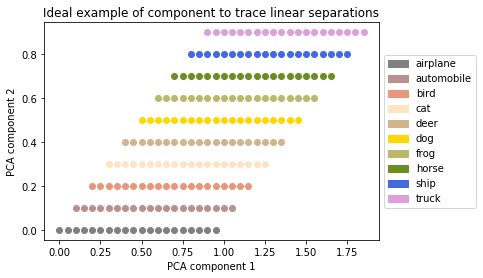

In [24]:
lnr.plot_best_case_scenario(colors, labels)

Ci-dessus un affichage du cas "parfait" qui nous permettrait de faire une séparation linéaire aisément, pour créer
un modèle linéaire capable de prédire nos différentes classes.

Est-il possible de créer un modèle linéaire avec Tensorflow ?
Nous pouvons toujours essayer en créant un modèle linéaire simple de ce type :

In [2]:
from  src.models.processes import linear

linear.create_and_train_model()

Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\responses\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\responses\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\logs\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\checkspoints\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\logs\tensorboard\fit\
Successfully created the dir : C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\logs\tensorboard\fit\linear_2_20200129-175333\
C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\logs\linear_2.log
C:\Users\thuchard\PycharmProjects\dl-kaggle-dataset-analysis\src\models\checkspoints\linear_2.ckpt
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
47104/50000 [=======

On observe que notre précision diminue avec au final un `sparse_categorical_accuracy: 0.1055` qui passe à `0.0798` et un
`val_sparse_categorical_accuracy: 0.1096` qui passe à `val_sparse_categorical_accuracy: 0.0840` ce qui est normal pour
le type de données que l'on a.

## Conclusion

On remarque qu'il n'est pas possible de créer simplement un modèle linéaire à partir de nos données brut. La méthode
de la régression linéaire n'est donc pas vraiment adaptée à nos images.

Le modèle linéaire est beaucoup plus adapté quand par example on a des données évidentes et comparable avec au moins
la capacité de tracer une droite de régression pouvant séparer linéairement nos classes. Dans le cas contraire
il est impossible de prédire correctement les différentes classes de CIFAR-10.

Cependant il existe d'autres méthodes plus adaptées à ce dataset que vous pouvez consulter dans les autres notebooks présent dans ce dossier.